In [20]:
%load_ext autoreload
%autoreload 2

from brian2 import *
import matplotlib.pyplot as plt
import numpy as np
from random import sample
import numpy.random as rnd
from math import floor
import time
from src import sim_decision_making_network, run_multiple_simulations, plot_network_activity

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%matplotlib inline

In [3]:
# clear_cache('cython')

In [8]:
defaultclock.dt = 0.10 * ms

# 12.1.2

In [11]:
results = sim_decision_making_network(t_stimulus_start= 50. * ms, coherence_level=-0.6, max_sim_time=1000. * ms)

simulating 480 neurons. Start: Wed May 29 11:43:50 2024
sim end: Wed May 29 11:50:55 2024


In [14]:
results.keys()

dict_keys(['rate_monitor_A', 'spike_monitor_A', 'voltage_monitor_A', 'idx_monitored_neurons_A', 'rate_monitor_B', 'spike_monitor_B', 'voltage_monitor_B', 'idx_monitored_neurons_B', 'rate_monitor_Z', 'spike_monitor_Z', 'voltage_monitor_Z', 'idx_monitored_neurons_Z', 'rate_monitor_inhib', 'spike_monitor_inhib', 'voltage_monitor_inhib', 'idx_monitored_neurons_inhib'])

INFO       width adjusted from 2. ms to 2.1 ms [brian2.monitors.ratemonitor.adjusted_width]


(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

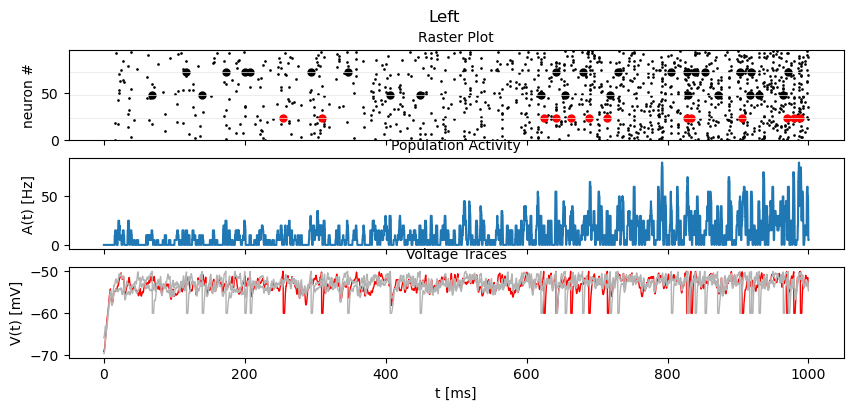

In [21]:
plot_network_activity(
    results["rate_monitor_A"], results["spike_monitor_A"], results["voltage_monitor_A"], t_min=0. * ms, avg_window_width=2. * ms,sup_title="Left"
)

(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

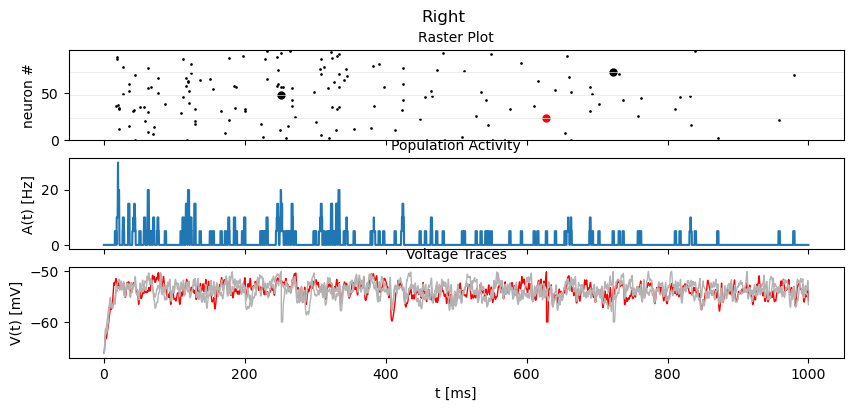

In [23]:
plot_network_activity(
    results["rate_monitor_B"], results["spike_monitor_B"], results["voltage_monitor_B"], t_min=0. * ms, avg_window_width=2. * ms,sup_title="Right"
)

(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

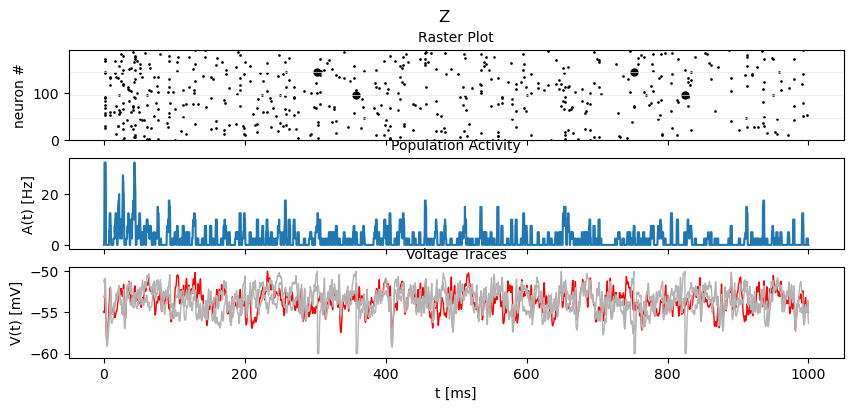

In [24]:
plot_network_activity(
    results["rate_monitor_Z"], results["spike_monitor_Z"], results["voltage_monitor_Z"], t_min=0. * ms, avg_window_width=2. * ms,sup_title="Z"
)

(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

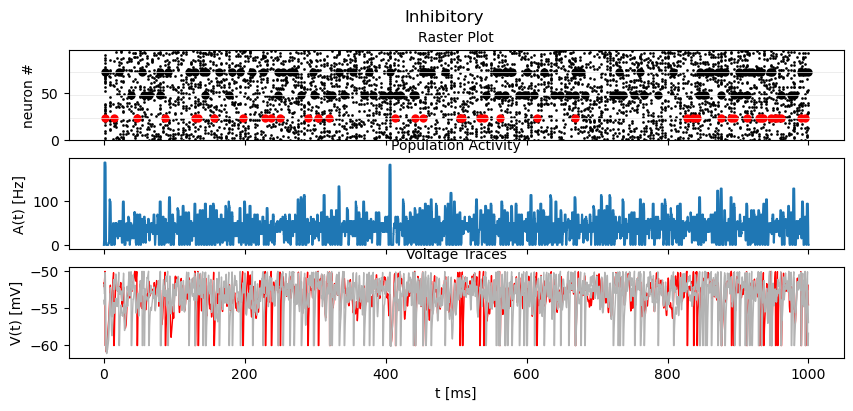

In [25]:
plot_network_activity(
    results["rate_monitor_inhib"], results["spike_monitor_inhib"], results["voltage_monitor_inhib"], t_min=0. * ms, avg_window_width=2. * ms,sup_title="Inhibitory"
)

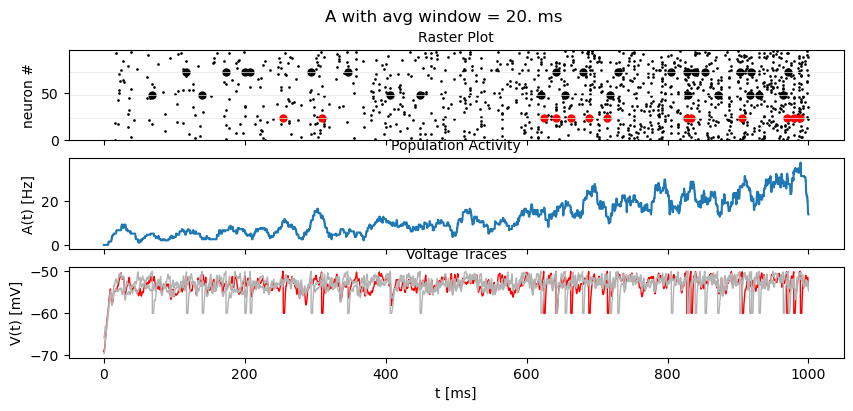

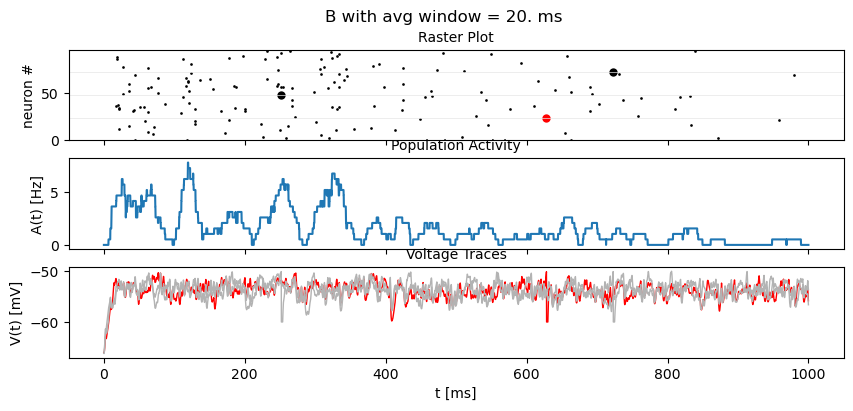

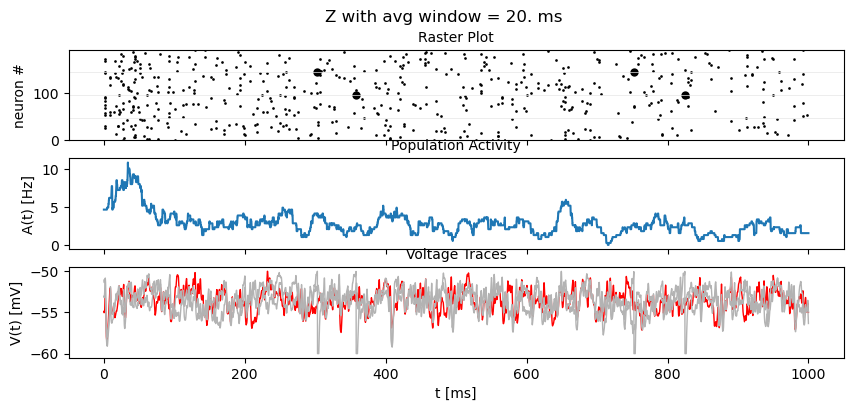

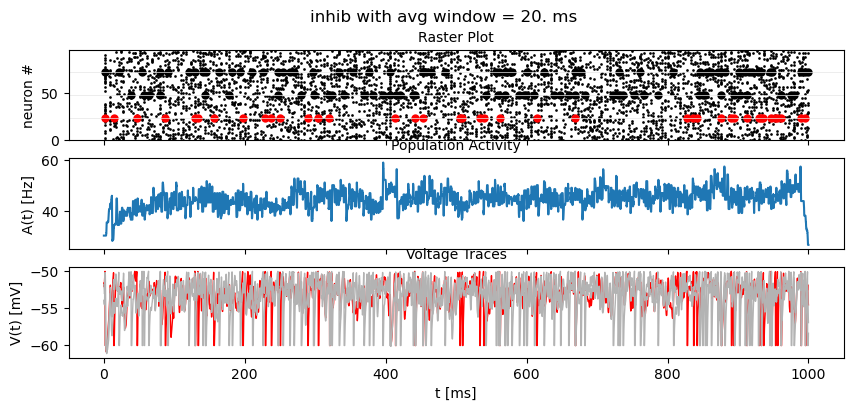

In [29]:
avg_window_width = 20 * ms

for population in ["A", "B", "Z", "inhib"]:
    plot_network_activity(
        results[f"rate_monitor_{population}"],
        results[f"spike_monitor_{population}"],
        results[f"voltage_monitor_{population}"],
        t_min=0. * ms,
        avg_window_width=avg_window_width,
        sup_title=f"{population} with avg window = {avg_window_width}"
    )

In [33]:
avg_window_width = 100*ms
sr = results["rate_monitor_A"].smooth_rate(window="flat", width=avg_window_width)/Hz
sr

array([ 2.39343989,  2.39343989,  2.39343989, ..., 15.08907759,
       14.98501499, 14.98501499])

# 12.2 

### $ \mu_{left} - \mu_{right}  = \mu_0 c $ and distribution of $ \nu_{left} - \nu_{right} \sim N(\mu_0 c, 2\sigma^2 ) $

### Default $\mu_0 = 160 Hz$ and $\sigma = 20 Hz$. For $c = -0.2$, $\mu_{left} = 64 Hz$ and $\mu_{right} = 96 Hz$. Therefore $\mu_{left} - \mu_{right} = -32 Hz $ and $2\sigma^2 = 800 Hz^2$

simulating 480 neurons. Start: Wed May 29 13:05:18 2024
sim end: Wed May 29 13:09:54 2024


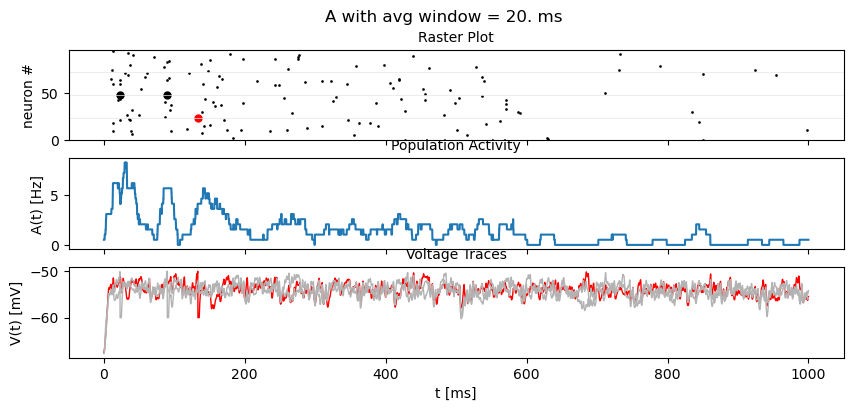

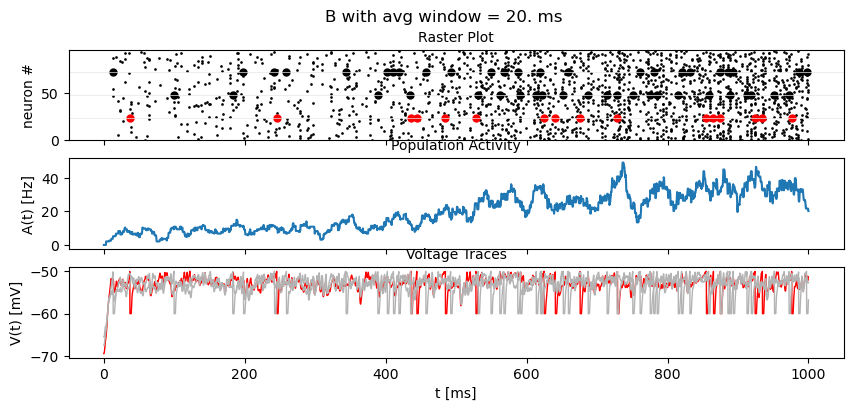

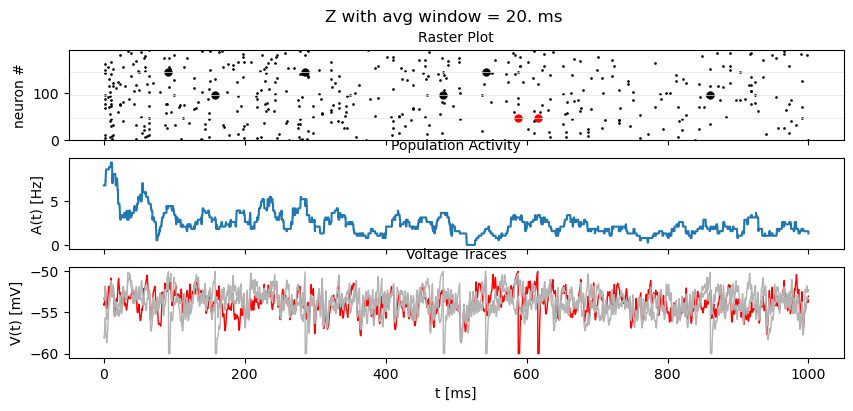

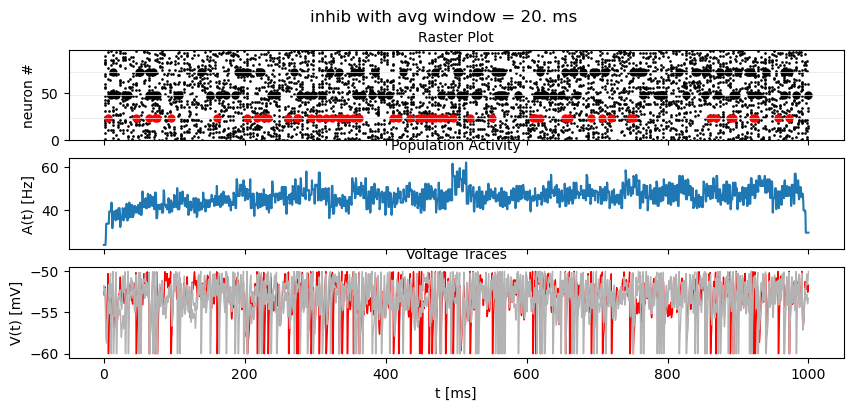

In [34]:
### Simulation with c = -0.1

results = sim_decision_making_network(t_stimulus_start= 50. * ms, coherence_level=-0.1, max_sim_time=1000. * ms)

avg_window_width = 20 * ms

for population in ["A", "B", "Z", "inhib"]:
    plot_network_activity(
        results[f"rate_monitor_{population}"],
        results[f"spike_monitor_{population}"],
        results[f"voltage_monitor_{population}"],
        t_min=0. * ms,
        avg_window_width=avg_window_width,
        sup_title=f"{population} with avg window = {avg_window_width}"
    )

simulating 480 neurons. Start: Wed May 29 13:28:32 2024
sim end: Wed May 29 13:33:42 2024


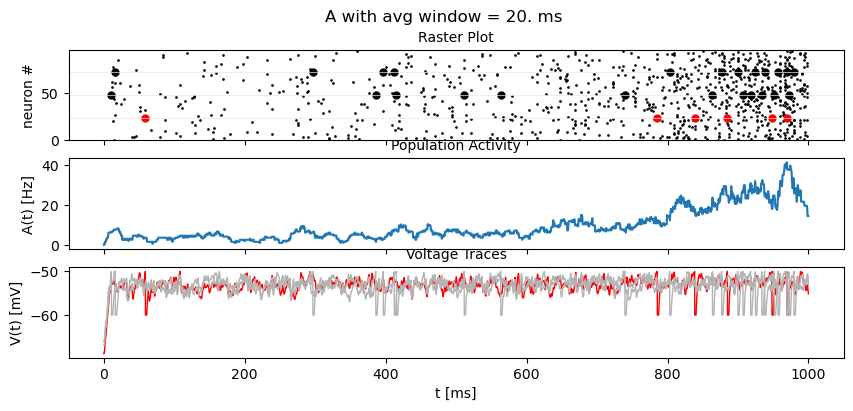

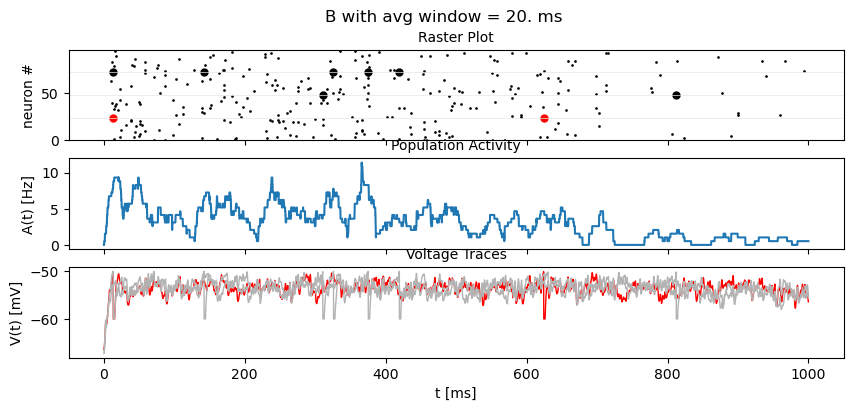

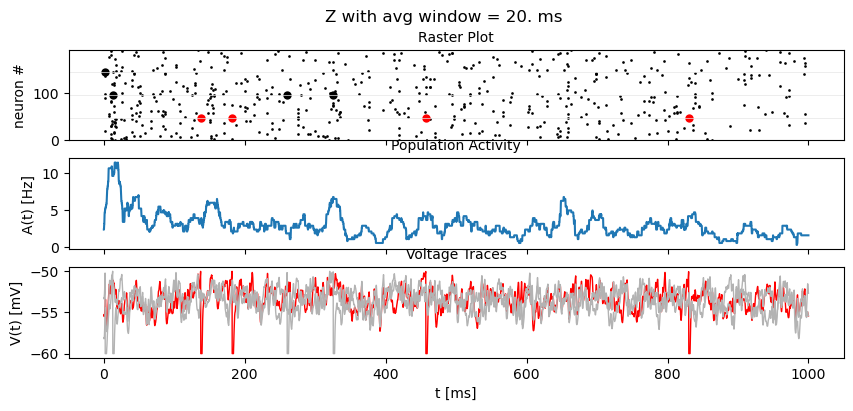

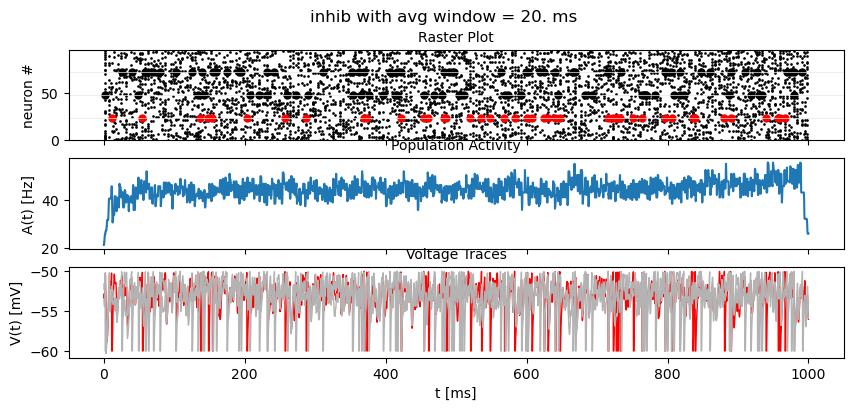

In [35]:
### Simulation with c = +0.6

results = sim_decision_making_network(t_stimulus_start= 50. * ms, coherence_level=0.6, max_sim_time=1000. * ms)

avg_window_width = 20 * ms

for population in ["A", "B", "Z", "inhib"]:
    plot_network_activity(
        results[f"rate_monitor_{population}"],
        results[f"spike_monitor_{population}"],
        results[f"voltage_monitor_{population}"],
        t_min=0. * ms,
        avg_window_width=avg_window_width,
        sup_title=f"{population} with avg window = {avg_window_width}"
    )

In [89]:
def decision_space_plot(rate_monitor_A, rate_monitor_B, avg_window_width):
    ts_A = rate_monitor_A.t/ms 
    ts_B = rate_monitor_B.t/ms

    sr_A = rate_monitor_A.smooth_rate(window="flat", width=avg_window_width)/Hz
    sr_B = rate_monitor_B.smooth_rate(window="flat", width=avg_window_width)/Hz

    fig,ax = plt.subplots(figsize = (5,5))
    ax.set_aspect("equal")
    sc = ax.scatter(sr_A, sr_B, c=ts_A/1000, cmap="viridis", zorder=1)
    cbar = fig.colorbar(sc, ax=ax, shrink=0.7)
    cbar.ax.set_ylabel("Time in s")
    ax.set_xlim(0, max(max(sr_A), max(sr_B)))
    ax.set_ylim(0, max(max(sr_A), max(sr_B)))
    ax.plot([0,max(max(sr_A), max(sr_B))], [0, max(max(sr_A), max(sr_B))], ls="--", color="k", zorder=2)
    ax.set_xlabel("Population Activity Left (Hz)")
    ax.set_ylabel("Population Activity Right (Hz)")
    fig.tight_layout()


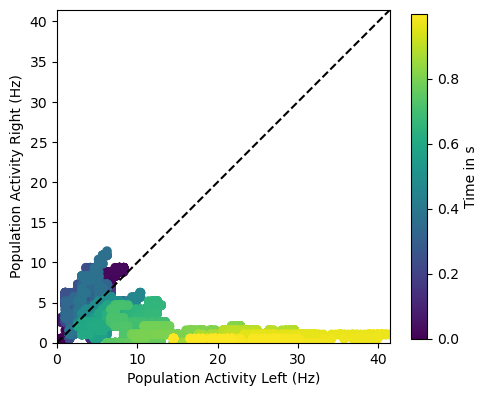

In [90]:
decision_space_plot(results["rate_monitor_A"], results["rate_monitor_B"], 20*ms)

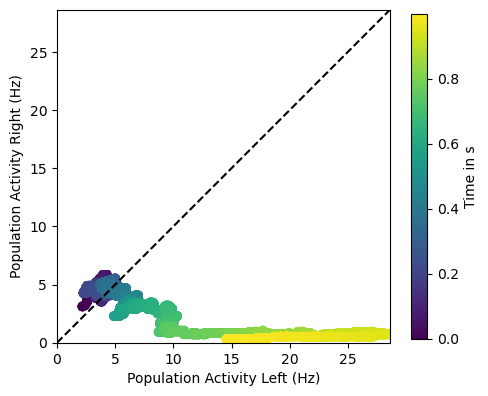

In [91]:
decision_space_plot(results["rate_monitor_A"], results["rate_monitor_B"], 100*ms)

In [92]:
def get_decision_time(rate_monitor_A, rate_monitor_B, avg_window_width, rate_threshold):
    ts_A = rate_monitor_A.t/ms 
    ts_B = rate_monitor_B.t/ms

    sr_A = rate_monitor_A.smooth_rate(window="flat", width=avg_window_width)/Hz
    sr_B = rate_monitor_B.smooth_rate(window="flat", width=avg_window_width)/Hz

    idx_A = np.argmax(sr_A > rate_threshold/Hz)
    t_A = idx_A * defaultclock.dt

    idx_B = np.argmax(sr_B > rate_threshold/Hz)
    t_B = idx_B * defaultclock.dt

    return (t_A, t_B)

In [99]:
get_decision_time(results["rate_monitor_A"], results["rate_monitor_B"], 100*ms, rate_threshold=20*Hz)

(0.8396 * second, 0. * second)

In [100]:
coherence_levels = [-0.1, -0.5]  # for negative values, B is the correct decision.
nr_repetitions = 3

time_to_A, time_to_B, count_A, count_B, count_No = run_multiple_simulations(
    get_decision_time,coherence_levels, nr_repetitions, max_sim_time=1000*ms, rate_threshold=20*Hz, avg_window_width=100*ms
)


********************************************
coherence_level=-0.1
i_run=0
simulating 480 neurons. Start: Wed May 29 18:29:33 2024
sim end: Wed May 29 18:30:17 2024
t_A=0.6103 s, t_B=0. s
decision: A
i_run=1
simulating 480 neurons. Start: Wed May 29 18:30:17 2024
sim end: Wed May 29 18:35:11 2024
t_A=0. s, t_B=0.875 s
decision: B
i_run=2
simulating 480 neurons. Start: Wed May 29 18:35:11 2024
sim end: Wed May 29 18:35:59 2024
t_A=0. s, t_B=0.6866 s
decision: B
********************************************
coherence_level=-0.5
i_run=0
simulating 480 neurons. Start: Wed May 29 18:35:59 2024
sim end: Wed May 29 18:36:43 2024
t_A=0. s, t_B=0.6255 s
decision: B
i_run=1
simulating 480 neurons. Start: Wed May 29 18:36:43 2024
sim end: Wed May 29 18:37:45 2024
t_A=0. s, t_B=0. s
no decision
i_run=2
simulating 480 neurons. Start: Wed May 29 18:37:45 2024
sim end: Wed May 29 18:38:37 2024
t_A=0. s, t_B=0.8215 s
decision: B


In [101]:
time_to_A, time_to_B, count_A, count_B, count_No

(array([[0.6103, 0.    , 0.    ],
        [0.    , 0.    , 0.    ]]),
 array([[0.    , 0.875 , 0.6866],
        [0.6255, 0.    , 0.8215]]),
 array([1, 0], dtype=int8),
 array([2, 2], dtype=int8),
 array([0, 1], dtype=int8))

In [102]:
#### 2/3rd of the time correct from above simulations. I will skip the last part to not heat up my laptop too much.